# [Mayo Clinic Low-dose CT image and projection dataset](https://onlinelibrary.wiley.com/doi/abs/10.1002/mp.14594)

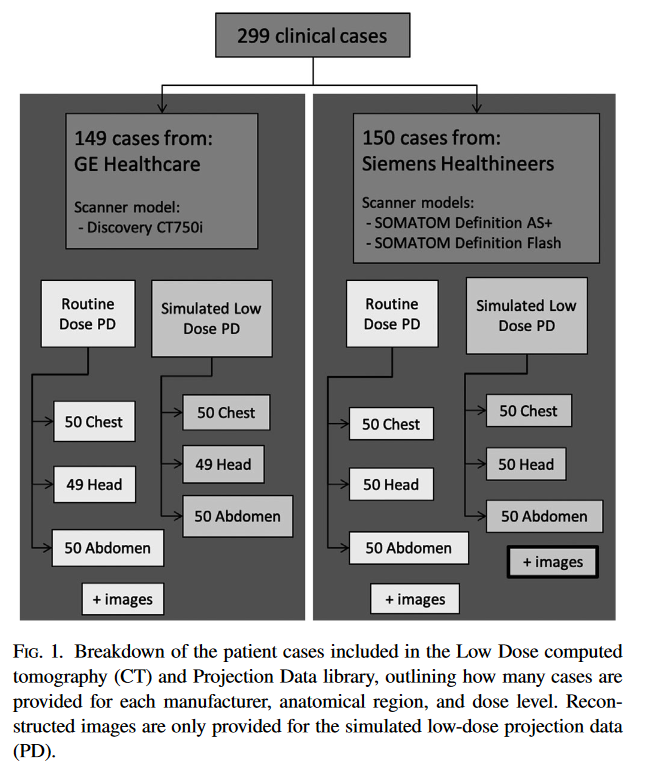

In [2]:
ls /gpfs_projects/common_data/DLIR/TCIA/manifest-1643214718297/

'Clinical Reports V2'/       downloadErrRpt.csv          metadata.csv
'Clinical Reports V2.zip'    LDCT-and-Projection-data/
 cythia_mayo_tcia_data.pdf   __MACOSX/


In [22]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import pydicom
ldct_dir = Path('/gpfs_projects/common_data/DLIR/TCIA/manifest-1643214718297')
meta = pd.read_csv(ldct_dir/'metadata.csv', index_col=0)
meta.head()

,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
Series UID,,,,,,,,,,,,,,,,
1.2.840.113713.4.100.1.2.952399635120614382042631185039882,LDCT-and-Projection-data,NO,NaN,C002,1.2.840.113713.4.100.1.2.379920499711584188724...,NaN,12-23-2021,Low Dose Images,Siemens Healthcare,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,280,147.45 MB,./LDCT-and-Projection-data/C002/12-23-2021-NA-...,2022-03-04T12:35:41.06
1.2.840.113713.4.100.1.2.313767519612442010219922297622038,LDCT-and-Projection-data,NO,NaN,C002,1.2.840.113713.4.100.1.2.379920499711584188724...,NaN,12-23-2021,Full Dose Images,Siemens Healthcare,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,280,147.45 MB,./LDCT-and-Projection-data/C002/12-23-2021-NA-...,2022-03-04T12:37:37.142
1.2.840.113713.4.2.254250404412167335901361307302730222835,LDCT-and-Projection-data,NaN,https://doi.org/10.7937/9npb2637,C002,1.2.840.113713.4.2.419826771011650487712551116...,NaN,08-30-2018,Full dose projections,SIEMENS,CT,Raw Data Storage,1.2.840.10008.5.1.4.1.1.66,11072,1.10 GB,./LDCT-and-Projection-data/C002/08-30-2018-NA-...,2022-03-04T12:40:43.106
1.2.840.113713.4.100.1.2.387637025611714728906566427473627,LDCT-and-Projection-data,NO,NaN,C004,1.2.840.113713.4.100.1.2.265314251132092600048...,NaN,12-23-2021,Full Dose Images,Siemens Healthcare,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,361,190.10 MB,./LDCT-and-Projection-data/C004/12-23-2021-NA-...,2022-03-04T12:41:02.986
1.2.840.113713.4.100.1.2.429586383113966624145669163330622,LDCT-and-Projection-data,NO,NaN,C004,1.2.840.113713.4.100.1.2.265314251132092600048...,NaN,12-23-2021,Low Dose Images,Siemens Healthcare,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,361,190.10 MB,./LDCT-and-Projection-data/C004/12-23-2021-NA-...,2022-03-04T12:41:15.385


In [23]:
patients = meta['Subject ID'].unique()
len(patients)

151

In [42]:
subject_id = patients[0]
dose = 'Full' # 'Full' or 'Low'
assert(dose in ['Full', 'Low'])
n_images = meta[(meta['Subject ID']==subject_id) & (meta['Series Description']==f'{dose} Dose Images')]['Number of Images'].item()
image_dcms = sorted(list(Path(ldct_dir / meta[(meta['Subject ID']==subject_id) & (meta['Series Description']==f'{dose} Dose Images')]['File Location'].item().strip('./')).glob('*')))
assert(len(image_dcms) == n_images)

In [43]:
def load_img(dcm_file):
    dcm = pydicom.read_file(dcm_file)
    return dcm.pixel_array + float(dcm.RescaleIntercept)

def ctshow(img, wwwl=(400, 50), colorbar=True, show=True):
    if isinstance(img, str | Path): img = load_img(img)
    ww, wl = wwwl
    vmin = wl - ww/2
    vmax = wl + ww/2
    f, ax = plt.subplots(dpi=300)
    im = ax.imshow(img, cmap='gray', vmin=vmin, vmax=vmax)
    if colorbar: plt.colorbar(im, ax=ax)
    plt.axis('off')
    if show: plt.show()

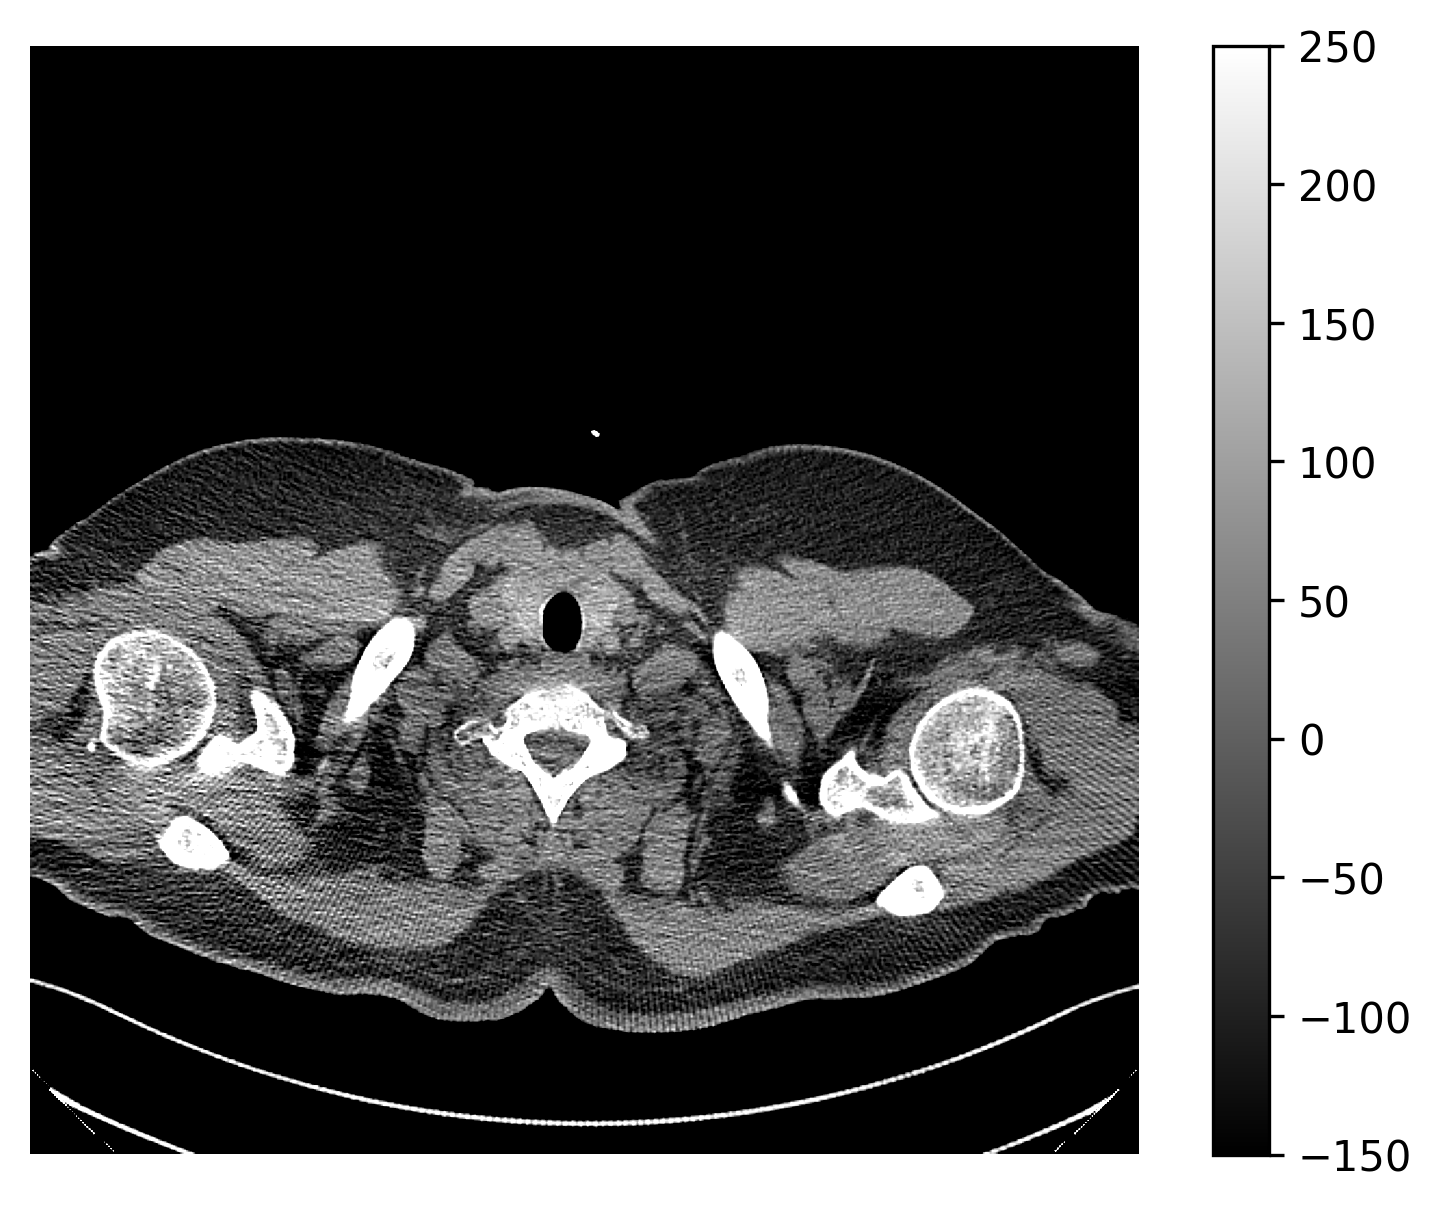

In [45]:
ctshow(load_img(image_dcms[2]))